In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier


# loading the data


In [224]:
path_train = "/kaggle/input/spaceship-titanic/train.csv"
path_test = "/kaggle/input/spaceship-titanic/test.csv"
train_data = pd.read_csv(path_train)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# loading and viewing the test data

In [225]:
test_data = pd.read_csv(path_test)
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [226]:
print(train_data.shape)
print(test_data.shape)

(8693, 14)
(4277, 13)


In [227]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [228]:
train_data.describe(include = "all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


# data cleaning and feature engineering

In [229]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# filling the missing data using bfill


In [230]:
train_data = train_data.fillna(method = "bfill")
train_data.isna().sum()



#for test data
test_data = test_data.fillna(method = "bfill")
test_data.isna().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# unique values 

In [231]:
for i in train_data.columns:
    print("\n",i,":",train_data[i].unique())


 PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

 HomePlanet : ['Europa' 'Earth' 'Mars']

 CryoSleep : [False  True]

 Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

 Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']

 Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]

 VIP : [False  True]

 RoomService : [   0.  109.   43. ... 1569. 8586.  745.]

 FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.]

 ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.]

 Spa : [   0.  549. 6715. ... 2868. 1107. 1643.]

 VRDeck : [   0.   44.   49. ... 1164.  971. 3235.]

 Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Cel

# eploratory data analysis

<Axes: xlabel='Transported', ylabel='count'>

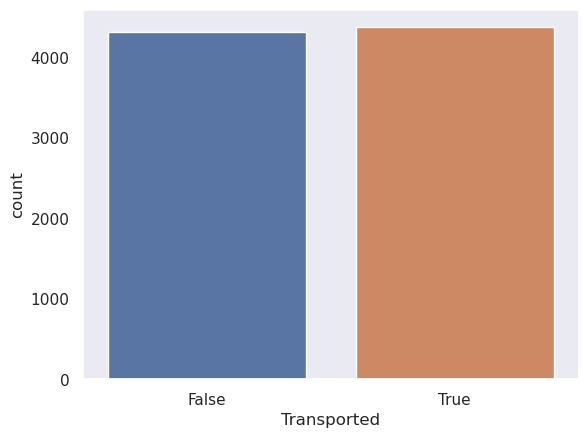

In [232]:
# checking the no of people transported
sns.countplot(x=train_data["Transported"])

distribution plots

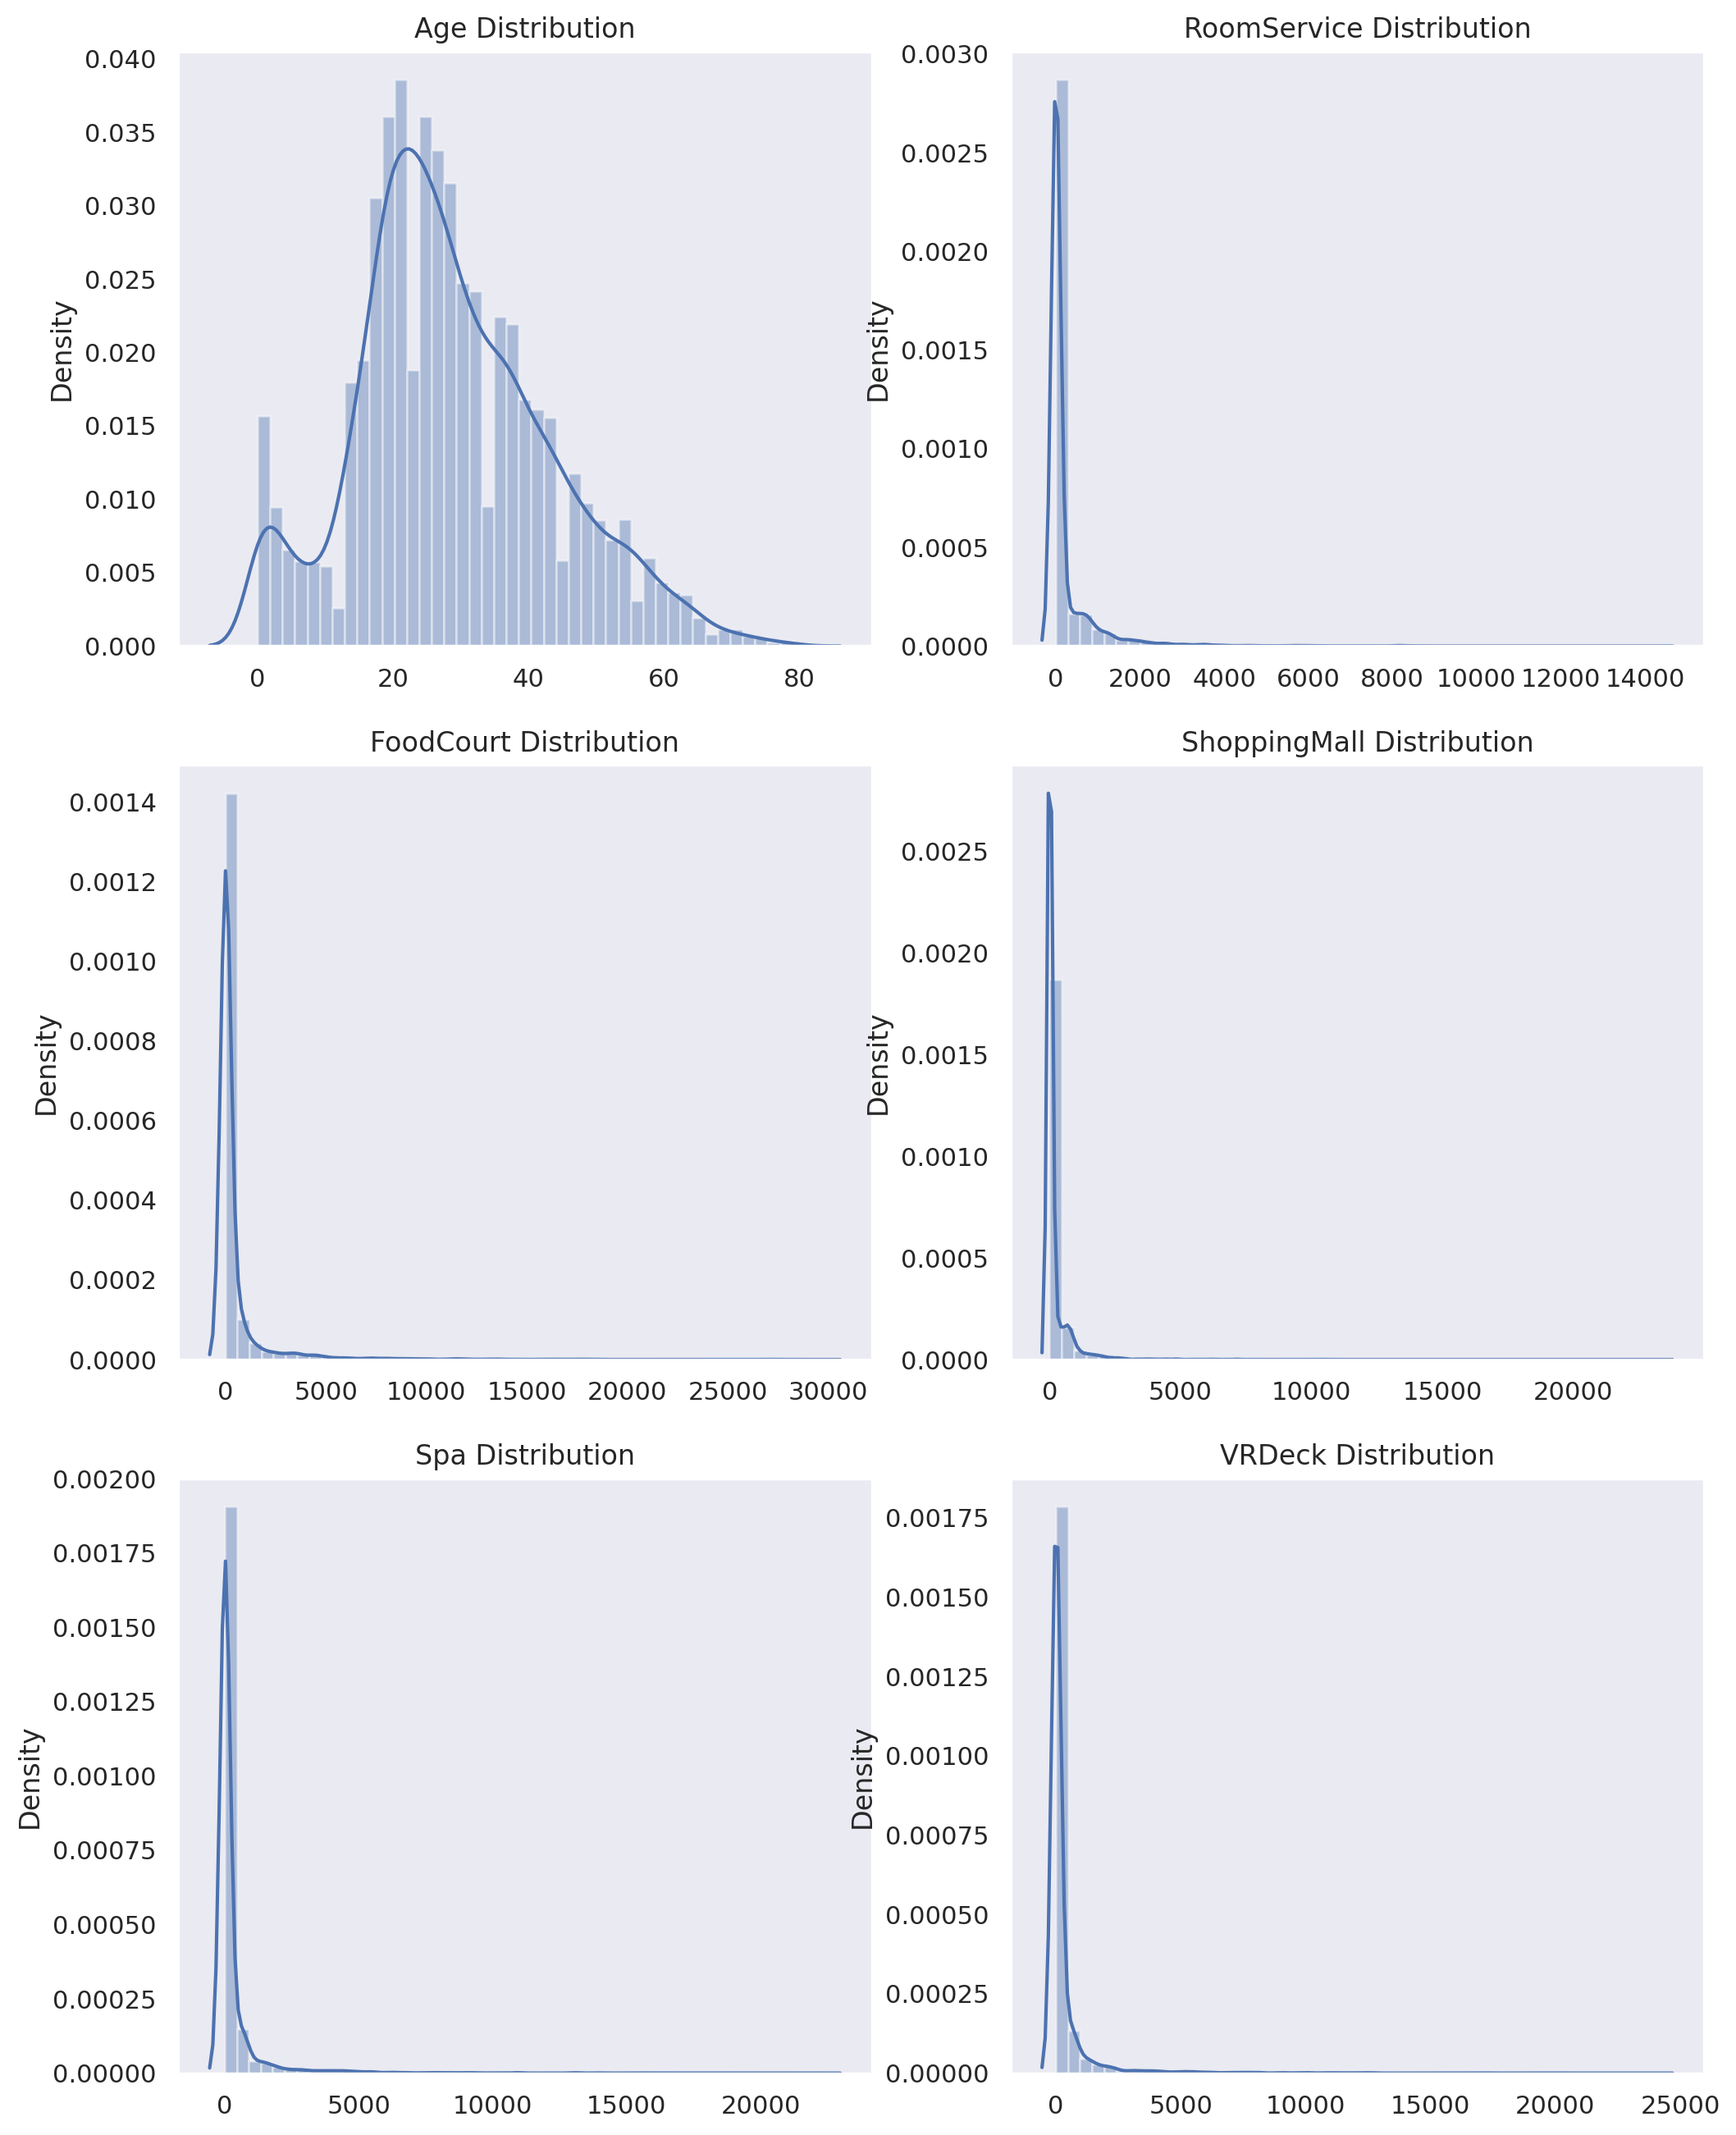

In [233]:
plt.figure(figsize = (12, 16), dpi = 200)
for i in range(len(train_data.loc[:, train_data.dtypes == np.float64].columns)):  
    plt.subplot(3,2,i+1)
    sns.distplot(x = train_data[train_data.loc[:, train_data.dtypes == np.float64].columns[i]])
    plt.title(train_data.loc[:, train_data.dtypes == np.float64].columns[i] + ' Distribution')


count plots for features vs transported


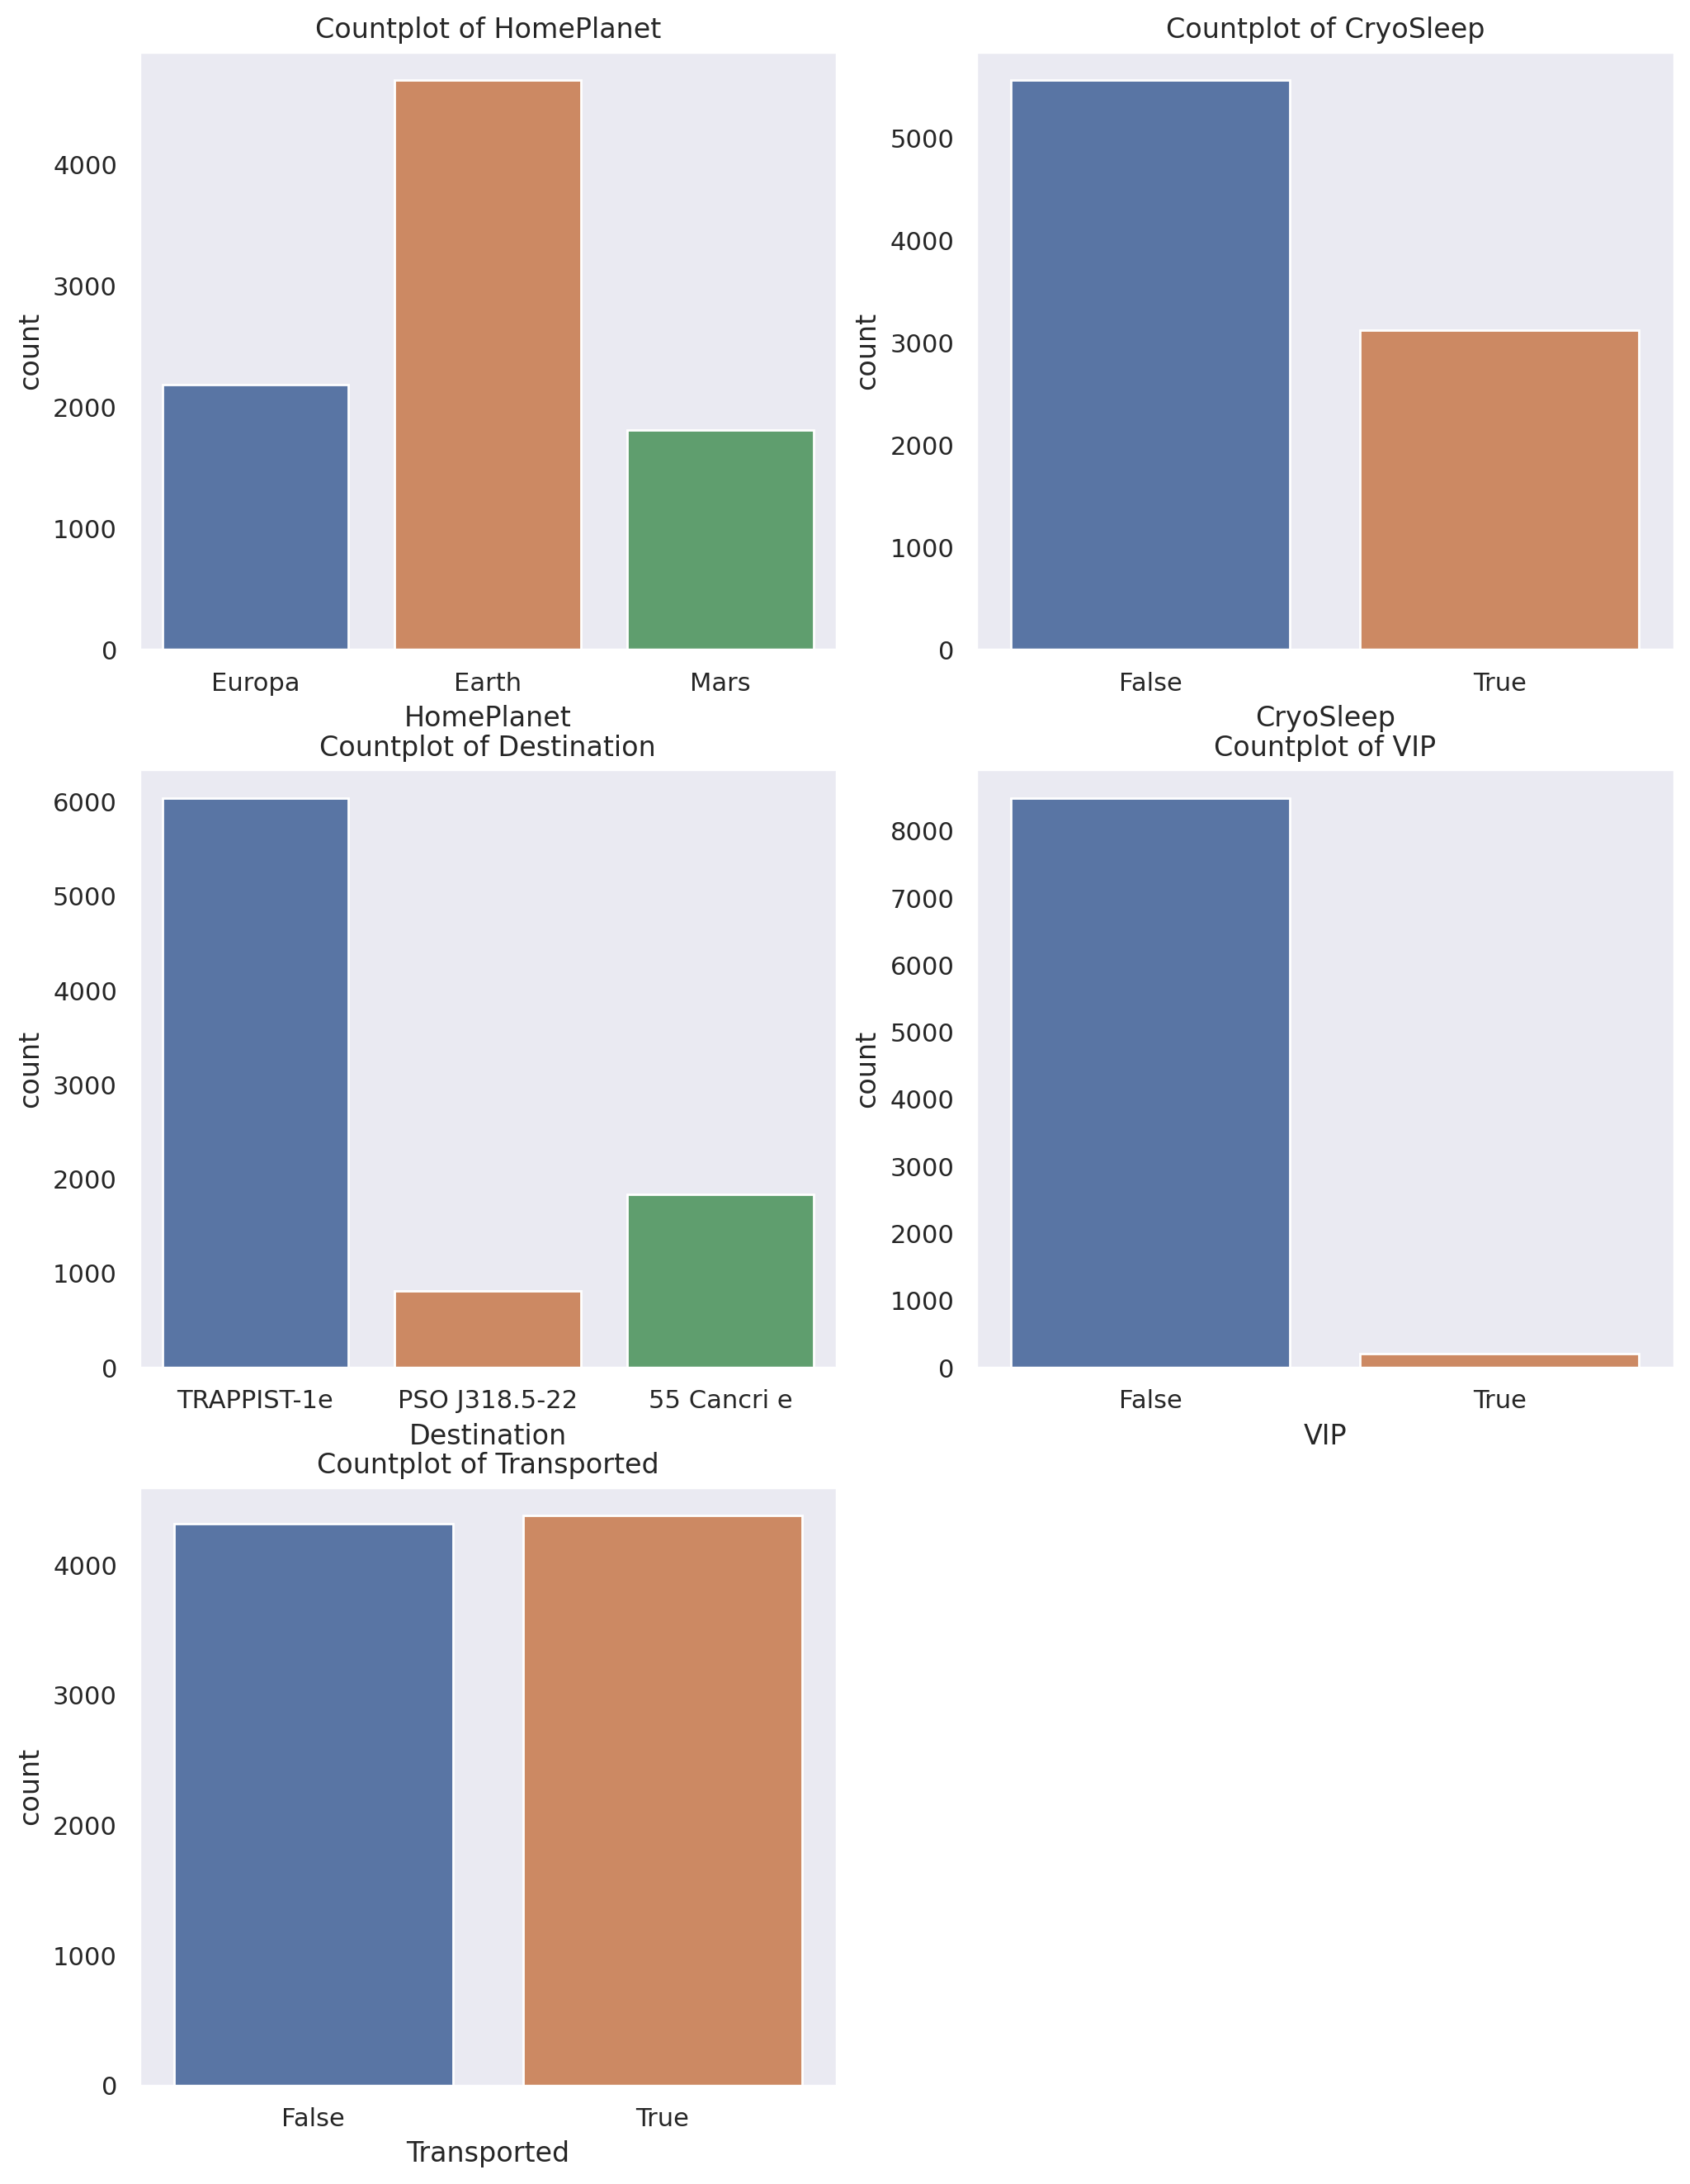

In [234]:
cols = ['HomePlanet', 'CryoSleep','Destination', 'VIP', 'Transported']
plt.figure(figsize = (12, 16), dpi = 200)
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=cols[i],data = train_data)
    plt.title('Countplot of ' + cols[i] )

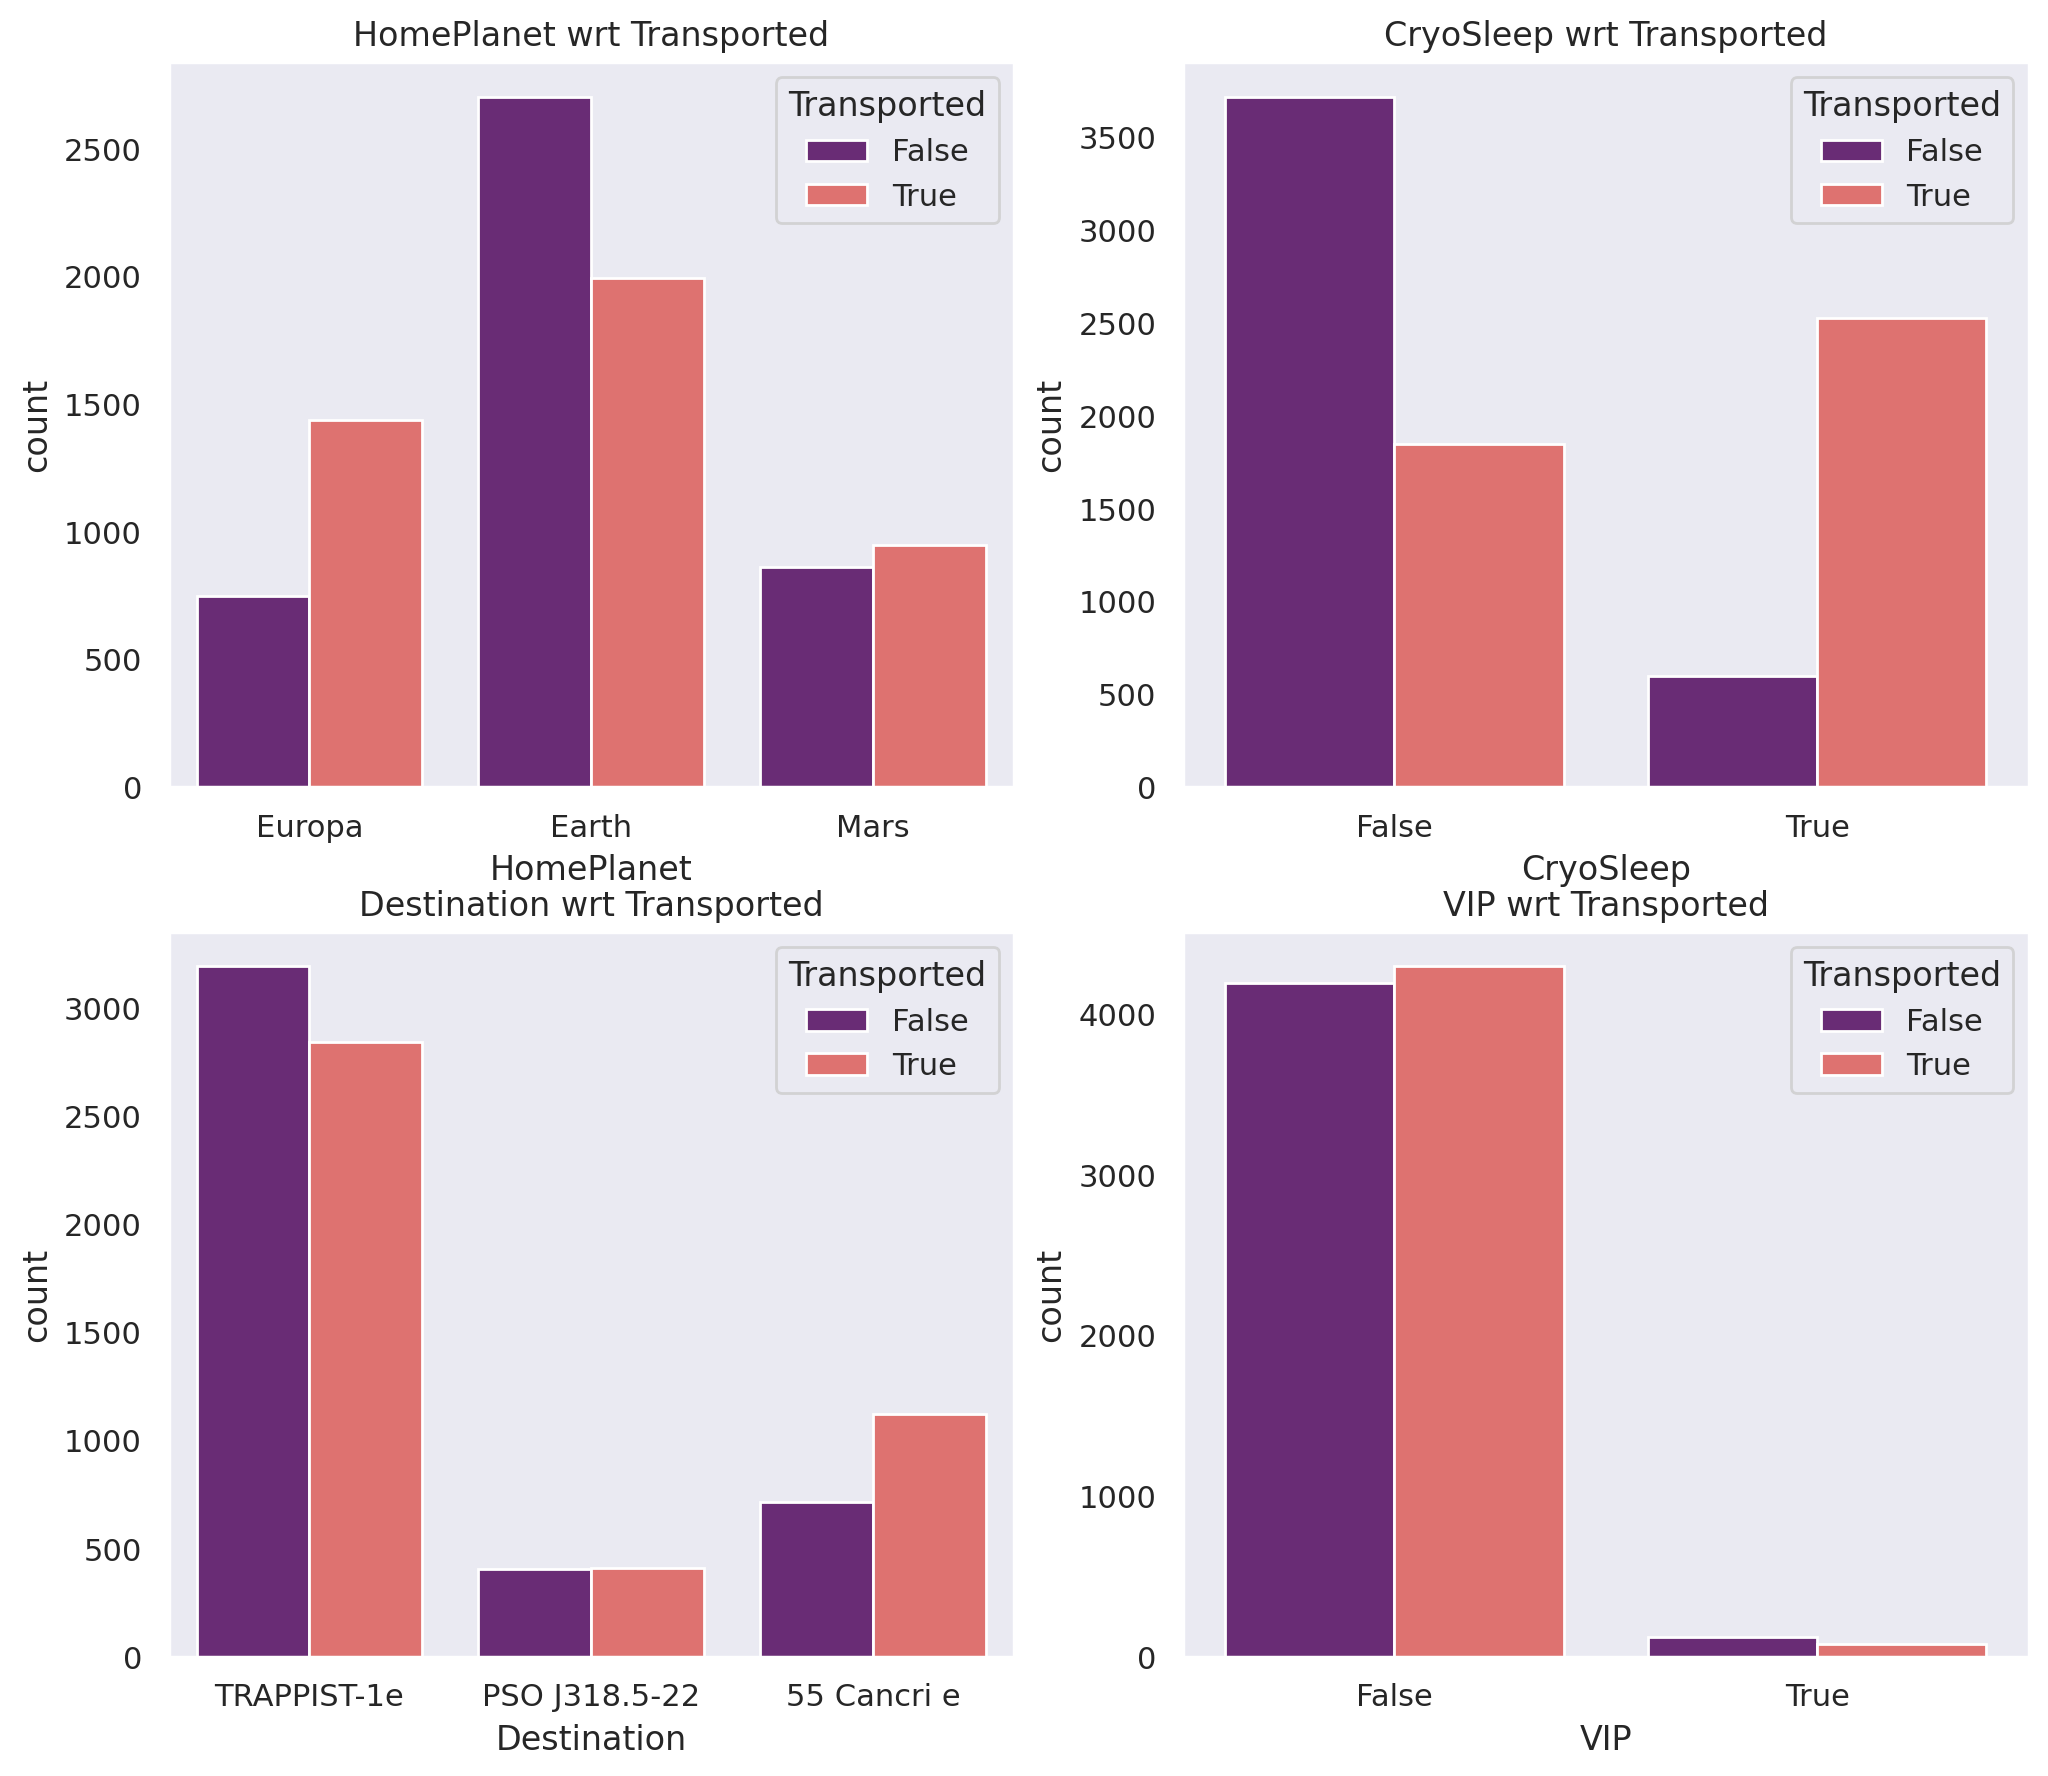

In [235]:

# Countplots for Independent Columns
cat_cols = ['HomePlanet', 'CryoSleep','Destination', 'VIP']
plt.figure(figsize = (12, 16), dpi = 200)
for i in range(len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x = cat_cols[i], hue = 'Transported', data = train_data, palette = 'magma')
    plt.title(cat_cols[i] +' wrt Transported')
plt.show()


# insights from graph
* person from europa is most likely to betransported
* person in cryo sleep is also more likely to be transported
* vip are not transported


<Axes: >

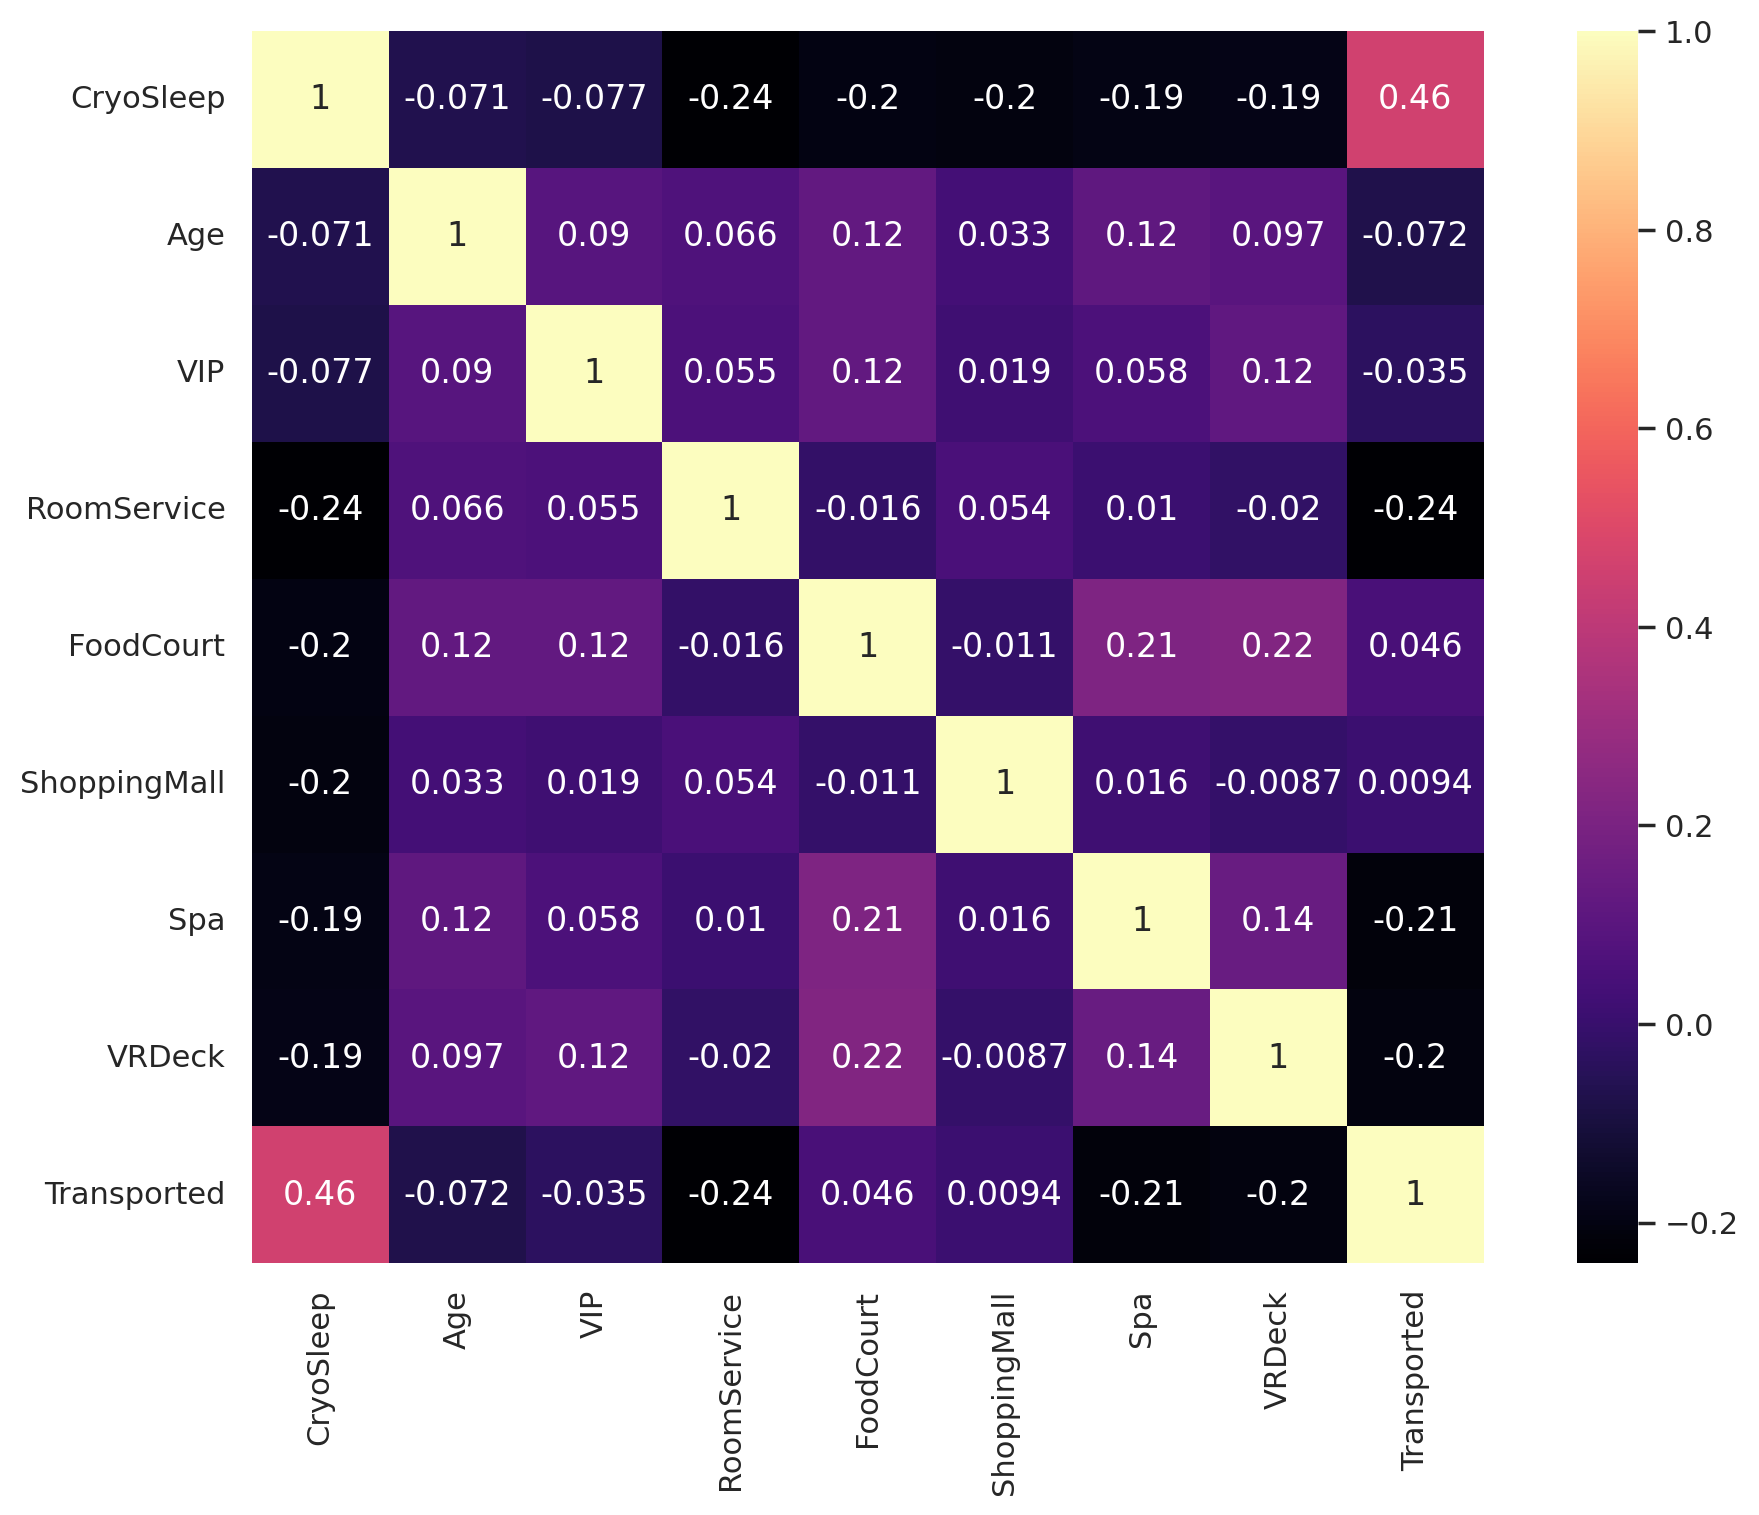

In [236]:
# Heatmap
plt.figure(figsize = (12, 8), dpi =200)
sns.heatmap(train_data.corr(), annot = True, square = True, cmap = 'magma')


In [237]:
X = train_data.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis = 1)
Y = train_data[['Transported']]
test_data = test_data.drop(['PassengerId', 'Cabin', 'Name'], axis = 1)

In [238]:
#print(X.head)
#train_data
print(Y)

      Transported
0           False
1            True
2           False
3           False
4            True
...           ...
8688        False
8689        False
8690         True
8691        False
8692         True

[8693 rows x 1 columns]


# transforming data

In [239]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

transformer = ColumnTransformer(transformers = [('Encoder1', OrdinalEncoder(), [0,1,2,4]),
                                               
                                                ('Scaler',   MinMaxScaler(), [3, 5,6,7,8,9])],
                                                 remainder = 'passthrough')
X = transformer.fit_transform(X)
transformer = ColumnTransformer(transformers = [('Encoder1', OrdinalEncoder(), [0,1,2,4]),
                                               
                                                ('Scaler',   MinMaxScaler(), [3,5,6,7,8,9])],
                                                 remainder = 'passthrough')

test_data = transformer.fit_transform(test_data)

In [240]:
print(train_data.shape)
print(test_data.shape)

(8693, 14)
(4277, 10)


In [241]:
Y['Transported'] = Y['Transported'].map({False : 0, True : 1})
#Y.fillna(method ="bfill")

In [242]:
print(X)

[[1.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.06419207e-03
  2.45001785e-02 1.82322960e-03]
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  2.99669761e-01 2.03041478e-03]
 ...
 [0.00000000e+00 0.00000000e+00 2.00000000e+00 ... 7.96867019e-02
  4.46269190e-05 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.57533024e-02 1.34048813e-01]
 [1.00000000e+00 0.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.97244437e-04]]


# train test split

In [243]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [244]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators =150, max_depth = 1000, random_state = 42,max_leaf_nodes=50)
rf_classifier.fit(x_train, y_train)
rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, rf_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, rf_pred_test))
    

Training Set Accuracy : 0.816508484325568
Testing Set Accuracy  : 0.7832087406555491


Training Set Accuracy : 0.9345700316364682 ############## 50
Testing Set Accuracy  : 0.7648073605520413 ############## 50
Training Set Accuracy : 0.9347138337647397 ############## 100
Testing Set Accuracy  : 0.7671075330649799 ############## 100
Training Set Accuracy : 0.9347138337647397 ############## 150
Testing Set Accuracy  : 0.7699827487061529 ############## 150
Training Set Accuracy : 0.9347138337647397 ############## 200
Testing Set Accuracy  : 0.7665324899367453 ############## 200
Training Set Accuracy : 0.9347138337647397 ############## 250
Testing Set Accuracy  : 0.7665324899367453 ############## 250
Training Set Accuracy : 0.9347138337647397 ############## 300
Testing Set Accuracy  : 0.7671075330649799 ############## 300
Training Set Accuracy : 0.9347138337647397 ############## 350
Testing Set Accuracy  : 0.7676825761932144 ############## 350
Training Set Accuracy : 0.9347138337647397 ############## 400
Testing Set Accuracy  : 0.7648073605520413 ############## 400
Training Set Accuracy : 0.9347138337647397 ############## 450
Testing Set Accuracy  : 0.7676825761932144 ############## 450
Training Set Accuracy : 0.9347138337647397 ############## 500
Testing Set Accuracy  : 0.7694077055779184 ############## 500
Training Set Accuracy : 0.9347138337647397 ############## 1000
Testing Set Accuracy  : 0.7665324899367453 ############## 1000
n_estimator

# training the model with all the data

In [245]:
rf_classifier.fit(X, Y)
rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, rf_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, rf_pred_test))

Training Set Accuracy : 0.8132010353753235
Testing Set Accuracy  : 0.79700977573318


# confution metrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

<Figure size 300x300 with 0 Axes>

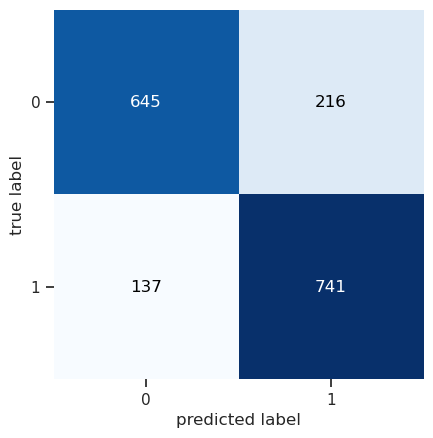

In [246]:
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

rf_cm = confusion_matrix(y_test, rf_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(rf_cm, [0, 1])

predicton on test _data

In [247]:
submissions = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submissions.head()
submissions.shape

(4277, 2)

In [248]:
pred_test_data = rf_classifier.predict(test_data)
pred_test_data.shape

(4277,)

In [249]:
submissions['Transported'] = pred_test_data
submissions.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [250]:
submissions['Transported'].replace({1 : True, 0 : False}, inplace = True)

In [251]:
submissions.Transported.value_counts()

True     2437
False    1840
Name: Transported, dtype: int64

In [256]:
submissions.to_csv('submission_Spaceship_Titanic.csv', index = False)

                   